In [8]:
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
import torch

from model import ResNet


In [9]:
x, sr = sf.read('resources/wav/id07396_aq4ZbefRp3E_00161.wav')
x = x.astype(np.float32)

In [10]:
model_new = ResNet(n_layers=[3, 5, 5, 3], init_planes=32)
model_new.load_state_dict(torch.load('models/asr_e19.pth'))
model_new.eval()
model_new.to('cuda:0')

model_old = ResNet(n_layers=[3, 5, 5, 3], init_planes=32)
model_old.load_state_dict(torch.load('models_old/asr_e19.pth'))
model_old.eval()
model_old.to('cuda:0')
print('')

In [11]:
sf.write('original.wav', x, samplerate=sr)
sf.write('original_downsample.wav', x[::2], samplerate=sr // 2)

In [12]:
x_zero = x.copy()
x_zero[::2] = 0

In [13]:
x_zero = torch.from_numpy(x_zero).unsqueeze(0).unsqueeze(0).to('cuda:0')

with torch.no_grad():
    out_new = model_new(x_zero)
sf.write('reconstruct_new.wav', out_new.squeeze().cpu().numpy(), 16000)

with torch.no_grad():
    out_old = model_old(x_zero)
sf.write('reconstruct_old.wav', out_old.squeeze().cpu().numpy(), 16000)


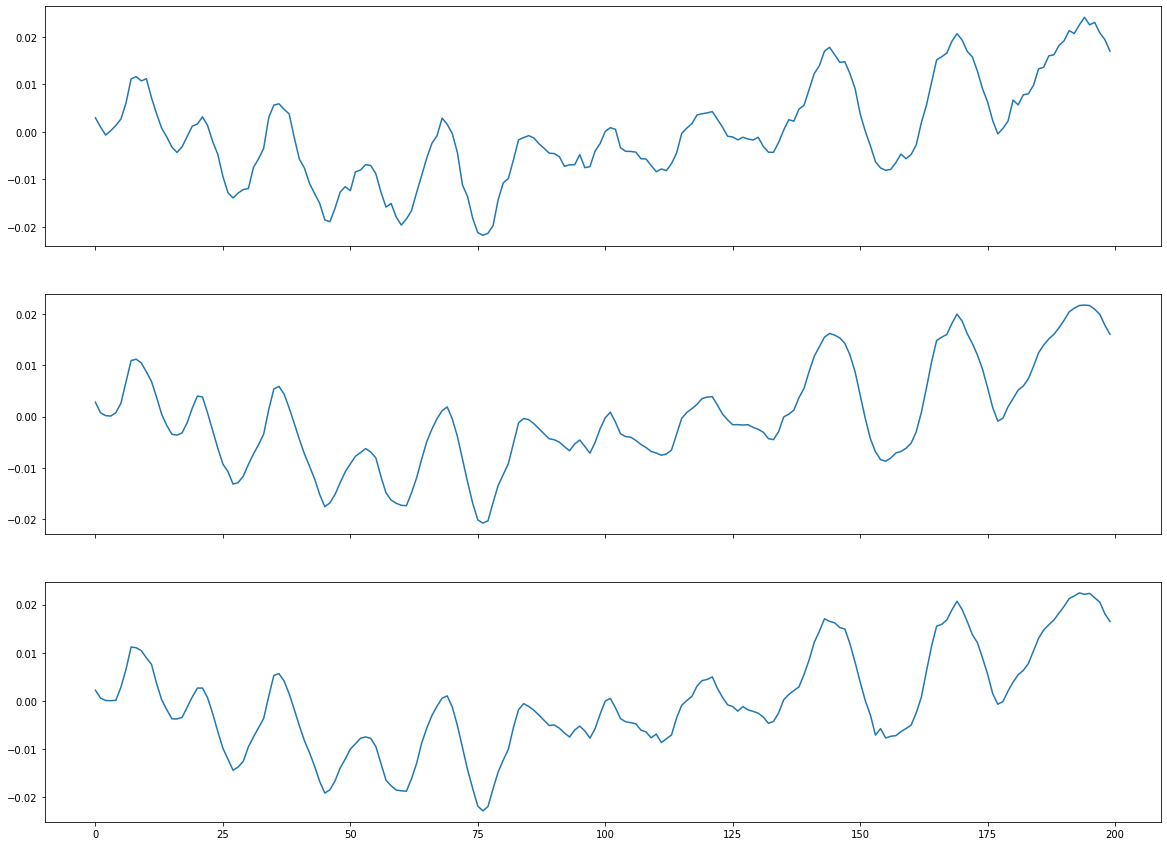

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(20, 15))
ax1.plot(x[1000:1200])
ax2.plot(out_old.squeeze().cpu().numpy()[1000:1200])
ax3.plot(out_new.squeeze().cpu().numpy()[1000:1200])